In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib.pyplot import xticks

In [2]:
customer = pd.read_csv('customer_data.csv')
sales = pd.read_csv('sales_data.csv')

In [3]:
customer.head()

,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [4]:
sales.head()

,invoice_no,customer_id,category,quantity,price,invoice_date,shopping_mall
0,I138884,C241288,Clothing,5,1500.40,05-08-2022,Kanyon
1,I317333,C111565,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,I127801,C266599,Clothing,1,300.08,09-11-2021,Metrocity
3,I173702,C988172,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,I337046,C189076,Books,4,60.60,24-10-2021,Kanyon


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [7]:
#DATA CLEANING
data = customer.merge(sales, on="customer_id", how="inner")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
 4   invoice_no      99457 non-null  object 
 5   category        99457 non-null  object 
 6   quantity        99457 non-null  int64  
 7   price           99457 non-null  float64
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


In [9]:
data.isnull().sum()

customer_id         0
gender              0
age               119
payment_method      0
invoice_no          0
category            0
quantity            0
price               0
invoice_date        0
shopping_mall       0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

customer_id       0
gender            0
age               0
payment_method    0
invoice_no        0
category          0
quantity          0
price             0
invoice_date      0
shopping_mall     0
dtype: int64

In [12]:
data.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,05-08-2022,Kanyon
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,12-12-2021,Forum Istanbul
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,09-11-2021,Metrocity
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,16-05-2021,Metropol AVM
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,24-10-2021,Kanyon


In [13]:
data.dtypes

customer_id        object
gender             object
age               float64
payment_method     object
invoice_no         object
category           object
quantity            int64
price             float64
invoice_date       object
shopping_mall      object
dtype: object

In [14]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d-%m-%Y')

In [15]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data.select_dtypes(include='object').nunique()

customer_id       99338
gender                2
payment_method        3
invoice_no        99338
category              8
shopping_mall        10
dtype: int64

In [17]:
data['payment_method'].unique()

array(['Credit Card', 'Debit Card', 'Cash'], dtype=object)

In [18]:
data['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [19]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
data['age'].unique()

array([28., 21., 20., 66., 53., 49., 32., 69., 60., 36., 29., 67., 25.,
       24., 65., 42., 46., 23., 27., 52., 44., 51., 50., 68., 43., 59.,
       54., 48., 40., 41., 19., 18., 22., 61., 45., 64., 33., 63., 34.,
       47., 38., 57., 30., 26., 62., 39., 55., 56., 35., 31., 37., 58.])

In [21]:
# WHAT IS THE MOST SELLED ITEMS

data['category'].value_counts()

category
Clothing           34445
Cosmetics          15084
Food & Beverage    14761
Toys               10071
Shoes              10015
Technology          4995
Souvenir            4991
Books               4976
Name: count, dtype: int64

In [22]:
#WHAT'S THE MOST PROFITABLE ITEM AMONGST EACH GENDER

data.pivot_table(index= "gender",columns= "category", values= "customer_id", aggfunc= "count")

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,2902,20631,9063,8792,5955,3010,2981,6078
Male,2074,13814,6021,5969,4060,1981,2014,3993


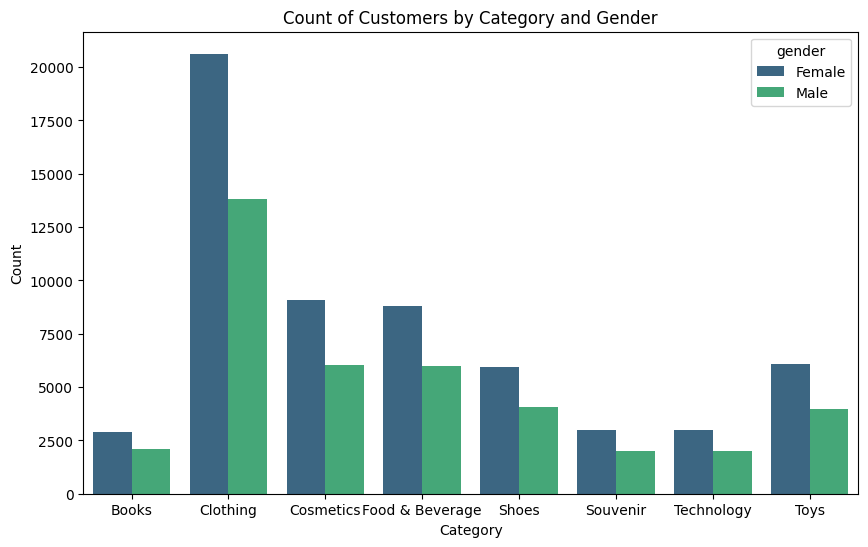

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

data_pivot = data.pivot_table(index="gender", columns="category", values="customer_id", aggfunc="count")
data_pivot = data_pivot.reset_index().melt(id_vars="gender", var_name="category", value_name="count")

#Grouped bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="category", y="count", hue="gender", data=data_pivot, palette="viridis")
plt.title("Count of Customers by Category and Gender")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


In [24]:
#AGE THAT MAKES THE MOST MONEY

data['profit'] = data['price'] * data['quantity']

data.pivot_table(index= 'gender', columns= 'age', values= 'profit', aggfunc= 'sum')

age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
gender,,,,,,,,,,,,,,,,,,,,,
Female,2619159.84,2804538.10,2699985.14,2974653.73,3181808.12,2877699.69,3117351.54,2863890.06,2969438.14,2906648.64,...,2923890.25,2781756.84,3002780.83,2903201.86,3142076.4,2938096.86,2550963.00,2951304.65,2871398.48,2660346.15
Male,1775859.70,1839772.42,1907838.71,1881192.87,2024632.61,1761389.40,1965058.36,1780563.40,2007160.25,2263644.16,...,1840821.43,1906290.11,1793875.65,1923196.42,2130398.7,1775804.96,2205677.74,1913621.15,2074580.59,1936823.99


In [25]:
data.groupby(["age", "gender"]).agg({"profit" : "sum"}).sort_values(by= "profit", ascending= False).head(20)

,,profit
age,gender,
37.0,Female,3651052.67
22.0,Female,3181808.12
64.0,Female,3142076.40
40.0,Female,3138856.37
24.0,Female,3117351.54
28.0,Female,3116308.13
39.0,Female,3108805.32
48.0,Female,3095976.86
44.0,Female,3040627.84


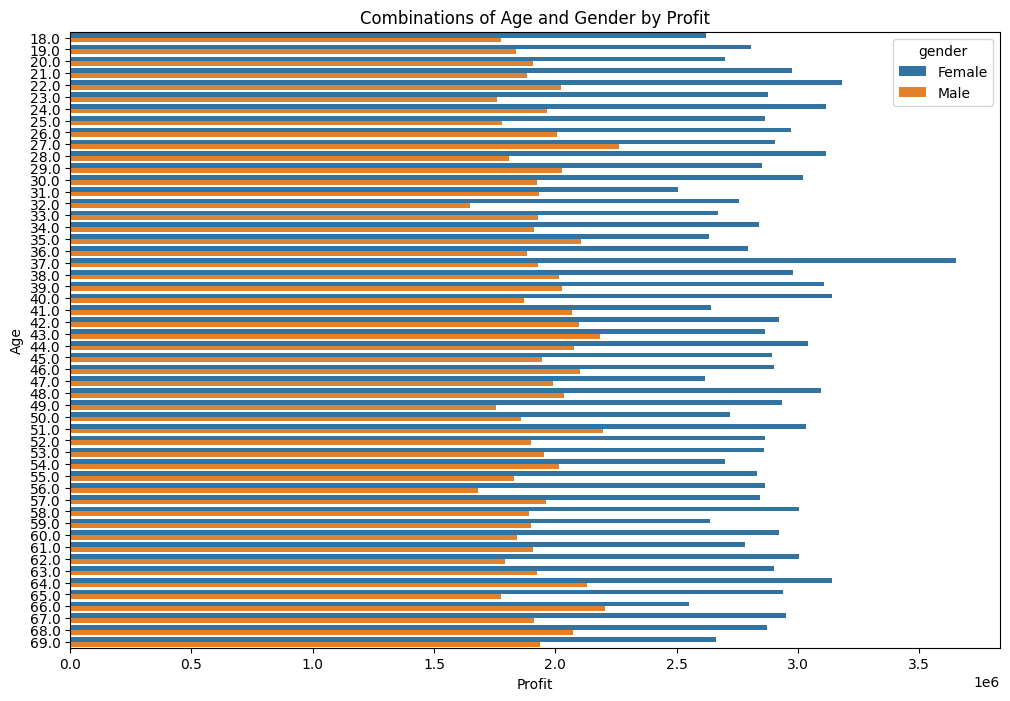

In [26]:
age_gender_profit = data.groupby(["age", "gender"]).agg({"profit": "sum"}).sort_values(by="profit", ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x="profit", y="age", hue="gender", data=age_gender_profit, orient="h")
plt.title("Combinations of Age and Gender by Profit")
plt.xlabel("Profit")
plt.ylabel("Age")
plt.show()

In [27]:
data.head()

,customer_id,gender,age,payment_method,invoice_no,category,quantity,price,invoice_date,shopping_mall,profit
0,C241288,Female,28.0,Credit Card,I138884,Clothing,5,1500.40,2022-08-05,Kanyon,7502.00
1,C111565,Male,21.0,Debit Card,I317333,Shoes,3,1800.51,2021-12-12,Forum Istanbul,5401.53
2,C266599,Male,20.0,Cash,I127801,Clothing,1,300.08,2021-11-09,Metrocity,300.08
3,C988172,Female,66.0,Credit Card,I173702,Shoes,5,3000.85,2021-05-16,Metropol AVM,15004.25
4,C189076,Female,53.0,Cash,I337046,Books,4,60.60,2021-10-24,Kanyon,242.40


In [28]:
data.drop(['customer_id', 'invoice_no', 'invoice_date'], axis = 1, inplace = True)

In [29]:
data.head()

,gender,age,payment_method,category,quantity,price,shopping_mall,profit
0,Female,28.0,Credit Card,Clothing,5,1500.40,Kanyon,7502.00
1,Male,21.0,Debit Card,Shoes,3,1800.51,Forum Istanbul,5401.53
2,Male,20.0,Cash,Clothing,1,300.08,Metrocity,300.08
3,Female,66.0,Credit Card,Shoes,5,3000.85,Metropol AVM,15004.25
4,Female,53.0,Cash,Books,4,60.60,Kanyon,242.40


In [30]:
data.describe()

,age,quantity,price,profit
count,99338.000000,99338.000000,99338.000000,99338.000000
mean,43.425859,3.003473,689.296890,2529.027490
std,14.989400,1.413009,941.368811,4223.330038
min,18.000000,1.000000,5.230000,5.230000
25%,30.000000,2.000000,45.450000,136.350000
50%,43.000000,3.000000,203.300000,600.170000
75%,56.000000,4.000000,1200.320000,2700.720000
max,69.000000,5.000000,5250.000000,26250.000000


C:\Users\ngqas\AppData\Local\Temp\ipykernel_23424\509185044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\ngqas\AppData\Local\Temp\ipykernel_23424\509185044.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins=20)
C:\Users\ngqas\AppData\Local\Temp\ip

<function matplotlib.pyplot.show(close=None, block=None)>

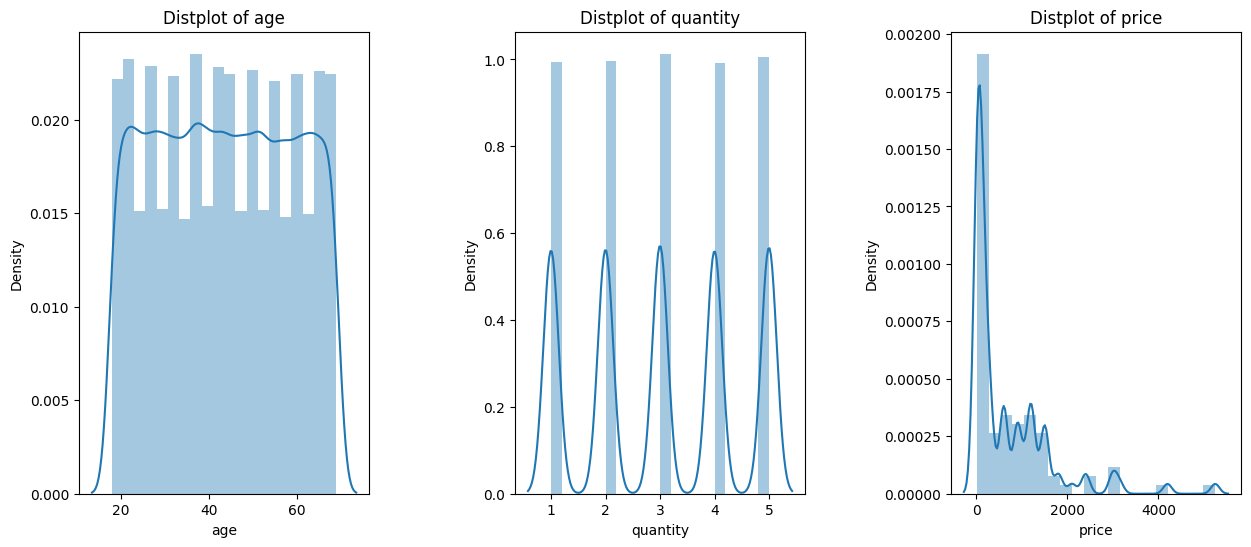

In [31]:
plt.figure(1, figsize=(15, 6))
n=0
for x in ['age','quantity','price']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(data[x], bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

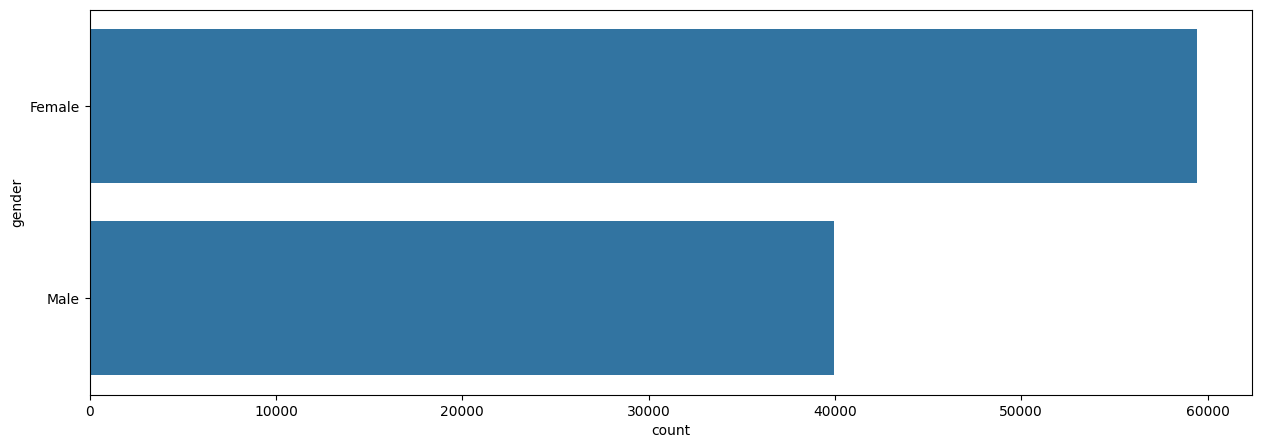

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(y='gender', data=data)
plt.show

C:\Users\ngqas\AppData\Local\Temp\ipykernel_23424\1008770821.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


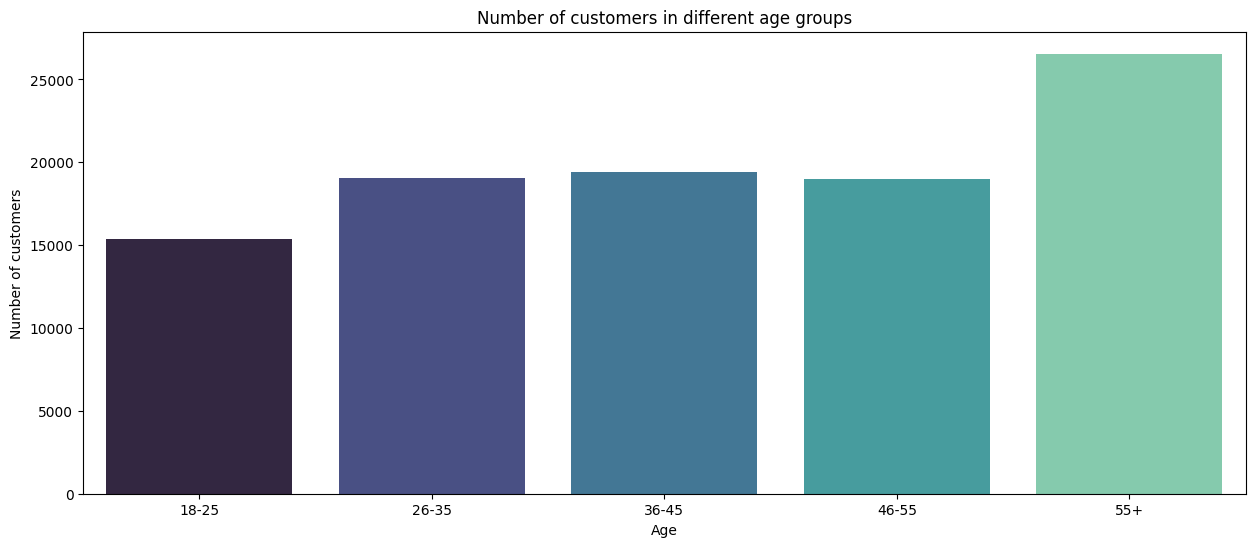

In [33]:
age_18_25 = data.age[(data.age >= 18) & (data.age <= 25)]
age_26_35 = data.age[(data.age >= 26) & (data.age <= 35)]
age_36_45 = data.age[(data.age >= 36) & (data.age <= 45)]
age_46_55 = data.age[(data.age >= 46) & (data.age <= 55)]
age_55above = data.age[data.age >= 56]

# Corrected age categories
agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15, 6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of customers in different age groups")
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()


In [34]:
data['age'].unique()

array([28., 21., 20., 66., 53., 49., 32., 69., 60., 36., 29., 67., 25.,
       24., 65., 42., 46., 23., 27., 52., 44., 51., 50., 68., 43., 59.,
       54., 48., 40., 41., 19., 18., 22., 61., 45., 64., 33., 63., 34.,
       47., 38., 57., 30., 26., 62., 39., 55., 56., 35., 31., 37., 58.])

In [35]:
data['quantity'] = data['quantity'].astype(object)

In [36]:
data['price'] = data['price'].astype(object)

In [37]:
data['age_bin'] = pd.cut(data['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
data = data.drop('age',axis = 1)

In [38]:
data.head()

,gender,payment_method,category,quantity,price,shopping_mall,profit,age_bin
0,Female,Credit Card,Clothing,5,1500.4,Kanyon,7502.00,20-30
1,Male,Debit Card,Shoes,3,1800.51,Forum Istanbul,5401.53,20-30
2,Male,Cash,Clothing,1,300.08,Metrocity,300.08,0-20
3,Female,Credit Card,Shoes,5,3000.85,Metropol AVM,15004.25,60-70
4,Female,Cash,Books,4,60.6,Kanyon,242.40,50-60


In [39]:
data_copy = data.copy()

In [40]:
#Preprocessing of the data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,gender,payment_method,category,quantity,price,shopping_mall,profit,age_bin
0,0,1,1,4,32,4,34,1
1,1,2,4,2,33,2,33,1
2,1,0,1,0,25,6,18,0
3,0,1,4,4,36,7,37,5
4,0,0,0,3,15,4,16,4


In [41]:
from kmodes.kmodes import KModes

In [42]:
#Using K-Mode with "Cao" initialization

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 519377.0


In [43]:
# Predicted Clusters

fitClusters_cao

array([1, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [44]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = data.columns

In [45]:
# Mode of the clusters
clusterCentroidsDf

,gender,payment_method,category,quantity,price,shopping_mall,profit,age_bin
0,0,0,1,2,28,5,30,1
1,1,1,1,4,32,4,34,2


In [46]:
#Using K-Mode with "Huang" initialization

km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19439, cost: 523154.0
Run 1, iteration: 2/100, moves: 4535, cost: 523154.0


In [47]:
# Predicted clusters
fitClusters_huang

array([0, 1, 1, ..., 1, 1, 0], dtype=uint16)

In [48]:
#Choosing K by comparing Cost against each K

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 583152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12011, cost: 521227.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22279, cost: 514560.0
Run 1, iteration: 2/100, moves: 2409, cost: 514560.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21879, cost: 477039.0
Run 1, iteration: 2/100, moves: 4789, cost: 477039.0


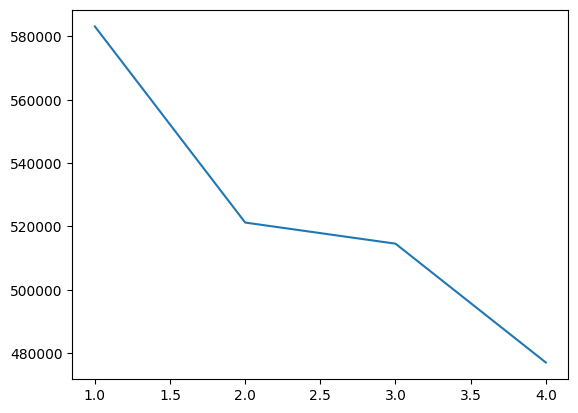

In [49]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [50]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_cao = km_huang.fit_predict(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4339, cost: 531121.0


In [51]:
fitClusters_huang

array([0, 1, 1, ..., 1, 1, 0], dtype=uint16)

In [52]:
#Combined predicted clusters with the oroginal DF
data = data_copy.reset_index()

In [53]:
clustersDf = pd.DataFrame(fitClusters_huang
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([data, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [54]:
combinedDf.head()

,gender,payment_method,category,quantity,price,shopping_mall,profit,age_bin,cluster_predicted
0,Female,Credit Card,Clothing,5,1500.4,Kanyon,7502.00,20-30,0
1,Male,Debit Card,Shoes,3,1800.51,Forum Istanbul,5401.53,20-30,0
2,Male,Cash,Clothing,1,300.08,Metrocity,300.08,0-20,0
3,Female,Credit Card,Shoes,5,3000.85,Metropol AVM,15004.25,60-70,1
4,Female,Cash,Books,4,60.6,Kanyon,242.40,50-60,0


In [55]:
#Cluster identification
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [56]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68541 entries, 0 to 99336
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             68541 non-null  object  
 1   payment_method     68541 non-null  object  
 2   category           68541 non-null  object  
 3   quantity           68541 non-null  object  
 4   price              68541 non-null  object  
 5   shopping_mall      68541 non-null  object  
 6   profit             68541 non-null  float64 
 7   age_bin            68541 non-null  category
 8   cluster_predicted  68541 non-null  uint16  
dtypes: category(1), float64(1), object(6), uint16(1)
memory usage: 4.4+ MB


In [57]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30797 entries, 3 to 99337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             30797 non-null  object  
 1   payment_method     30797 non-null  object  
 2   category           30797 non-null  object  
 3   quantity           30797 non-null  object  
 4   price              30797 non-null  object  
 5   shopping_mall      30797 non-null  object  
 6   profit             30797 non-null  float64 
 7   age_bin            30797 non-null  category
 8   cluster_predicted  30797 non-null  uint16  
dtypes: category(1), float64(1), object(6), uint16(1)
memory usage: 2.0+ MB


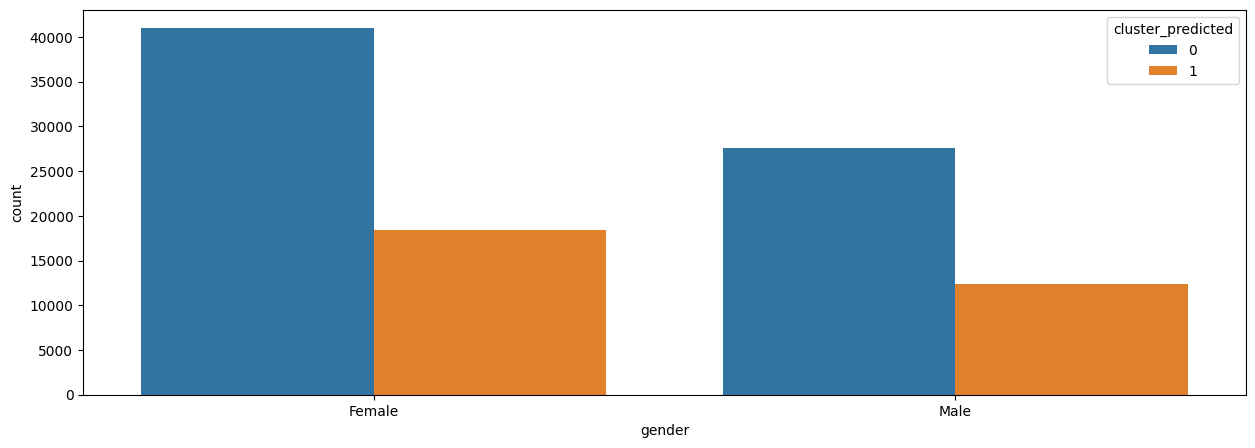

In [58]:
#Gender
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['gender'],order=combinedDf['gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


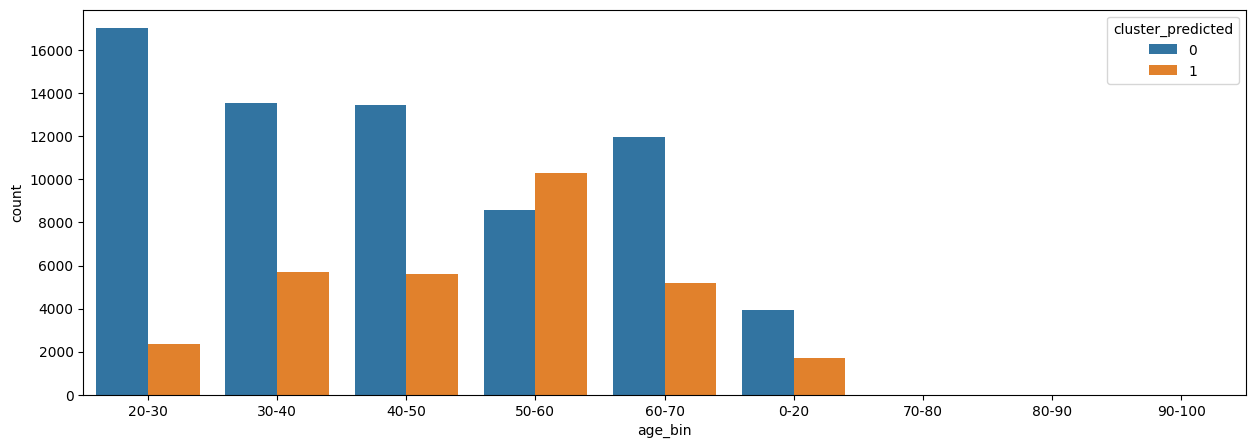

In [59]:
# Age
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

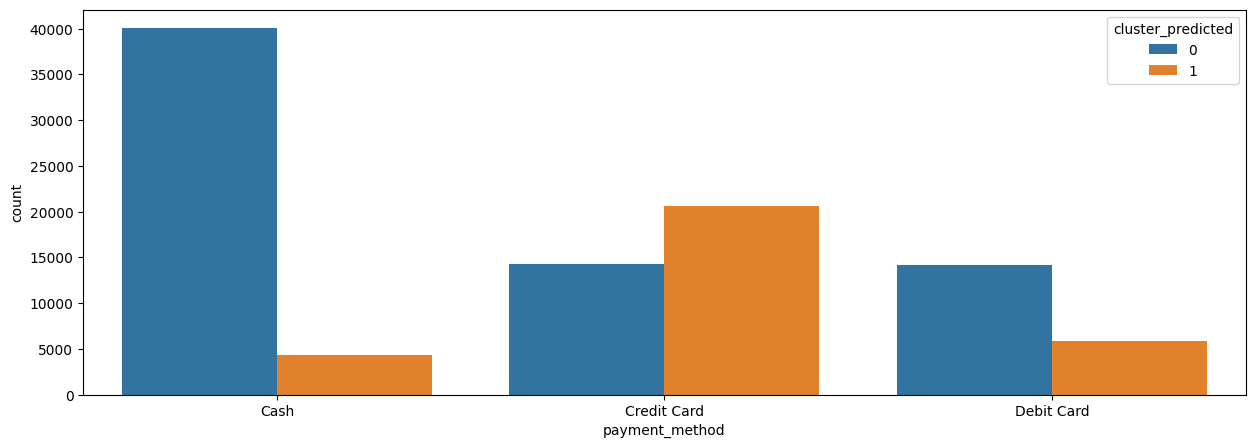

In [60]:
#Payment method

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['payment_method'],order=combinedDf['payment_method'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


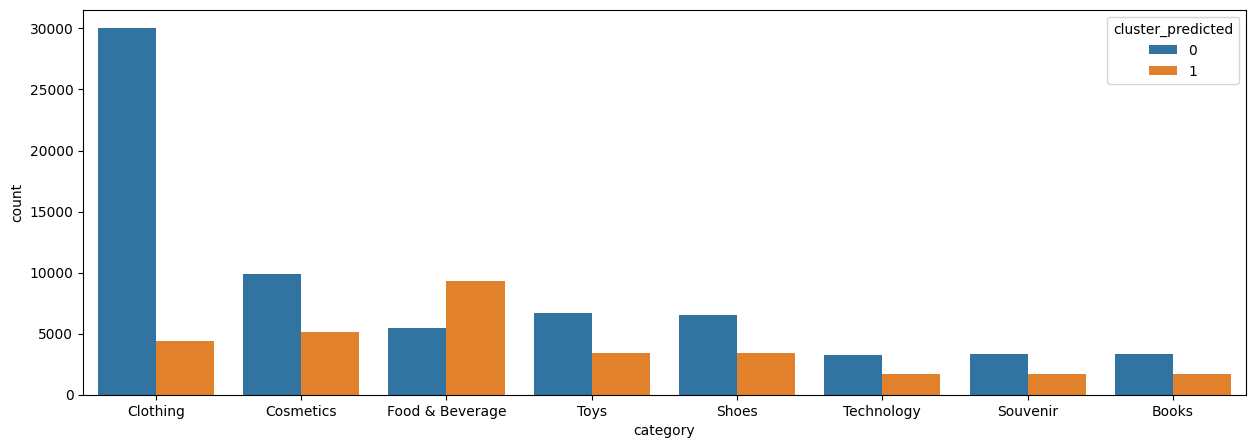

In [61]:
#Categories
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['category'],order=combinedDf['category'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


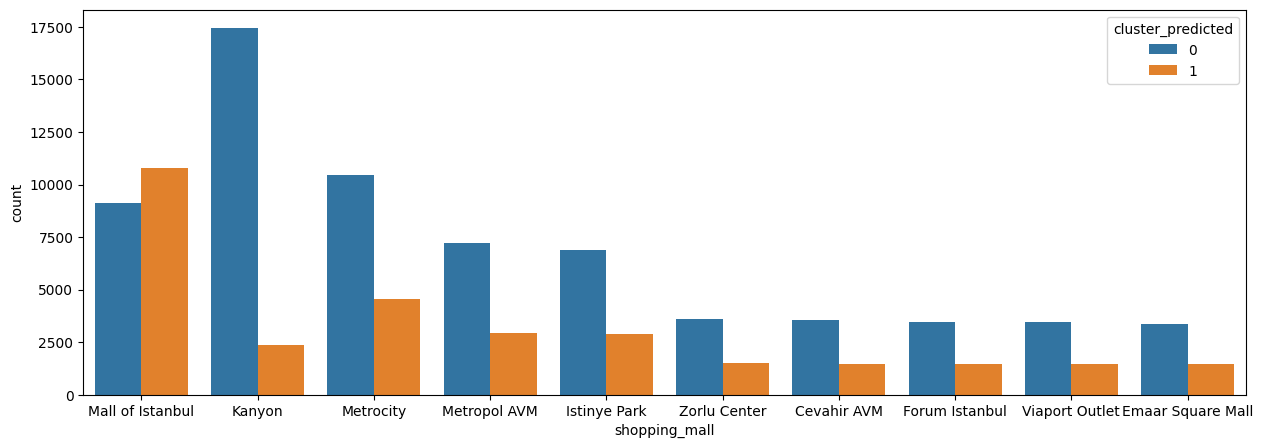

In [62]:
#Shopping mall

plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['shopping_mall'],order=combinedDf['shopping_mall'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()


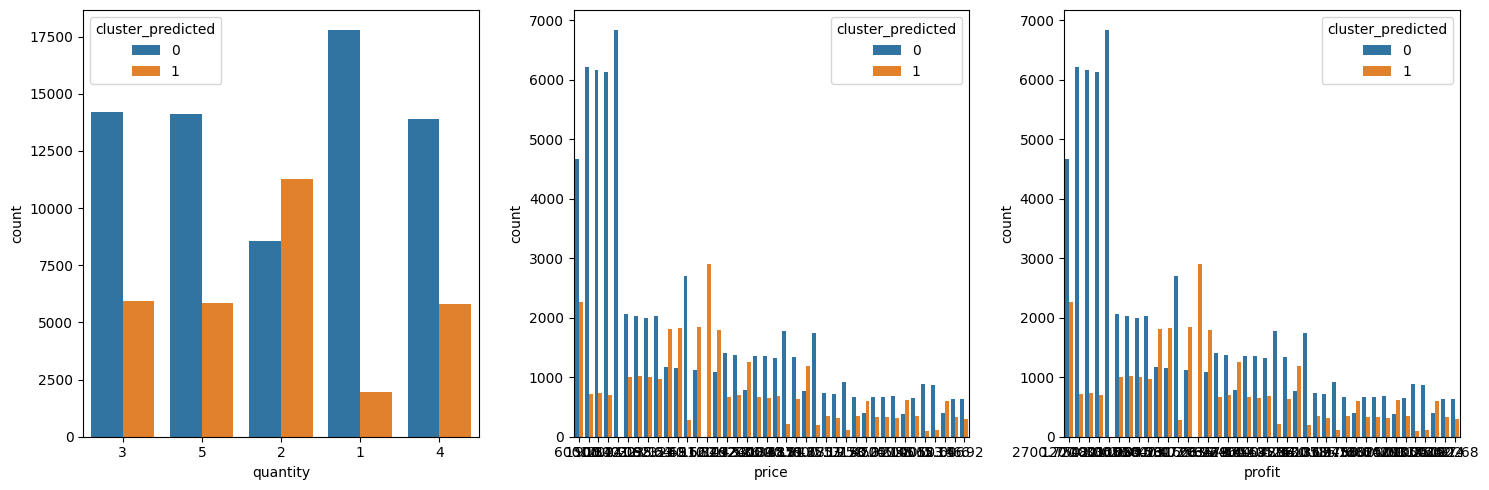

In [63]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['quantity'],order=combinedDf['quantity'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['price'],order=combinedDf['price'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['profit'],order=combinedDf['profit'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()


In [ ]:
# Above visualization helps with cluster identification